In [2]:
import pandas as pd

In [3]:
data=pd.read_csv(r'C:\Arpit\cubic_zirconia.csv')

In [4]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
data.drop('Unnamed: 0',1,inplace=True)

C:\Users\arpit\AppData\Local\Temp\ipykernel_3432\1612022029.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop('Unnamed: 0',1,inplace=True)


In [6]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [7]:
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [8]:
data.shape

(26967, 10)

In [9]:
data.dropna()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='color', ylabel='count'>

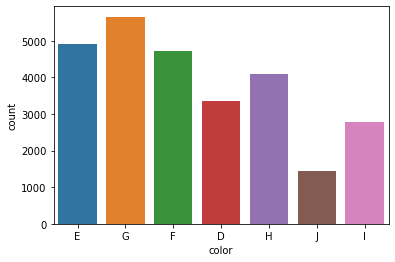

In [12]:
sns.countplot(x='color',data=data)

<AxesSubplot:xlabel='cut', ylabel='count'>

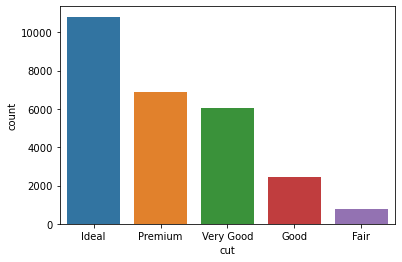

In [13]:
sns.countplot(x='cut',data=data)

In [14]:
color = pd.DataFrame(data['color'].value_counts())
color = color.reset_index()
color = color.rename(columns = {'index':'color', 'color':'count'})

for cl in color.color:
    color['perc'] = (color['count'] / data.shape[0] )*100

In [15]:
color.head()

,color,count,perc
0,G,5661,20.992324
1,E,4917,18.233396
2,F,4729,17.536248
3,H,4102,15.211184
4,D,3344,12.400341


([<matplotlib.patches.Wedge at 0x2a3011f4970>,
 [Text(0.9483632861222437, 0.7352598707500766, 'G'),
  Text(-0.34707716243334136, 1.0438091029097323, 'E'),
  Text(-1.091272802871757, 0.13828835711085485, 'F'),
  Text(-0.6814067931568663, -0.8635304176690454, 'H'),
  Text(0.21787445920509096, -1.0782071786192529, 'D'),
  Text(0.869647361554815, -0.6735825610426304, 'I'),
  Text(1.084493844496479, -0.18404646491918145, 'J')],
 [Text(0.5532119169046421, 0.428901591270878, '20.99%'),
  Text(-0.18931481587273163, 0.5693504197689448, '18.23%'),
  Text(-0.5952397106573221, 0.07543001296955718, '17.54%'),
  Text(-0.37167643263101796, -0.47101659145584285, '15.21%'),
  Text(0.11884061411186779, -0.5881130065195924, '12.40%'),
  Text(0.47435310630262634, -0.3674086696596165, '10.28%'),
  Text(0.5915420969980792, -0.10038898086500805, '5.35%')])

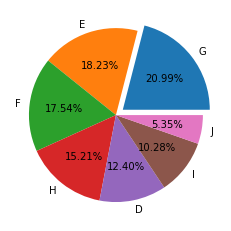

In [25]:
explode = [0.1,0,0,0,0,0,0]
plt.pie(x = 'perc' , labels = 'color',  autopct = '%1.2f%%',explode=explode,data = color)

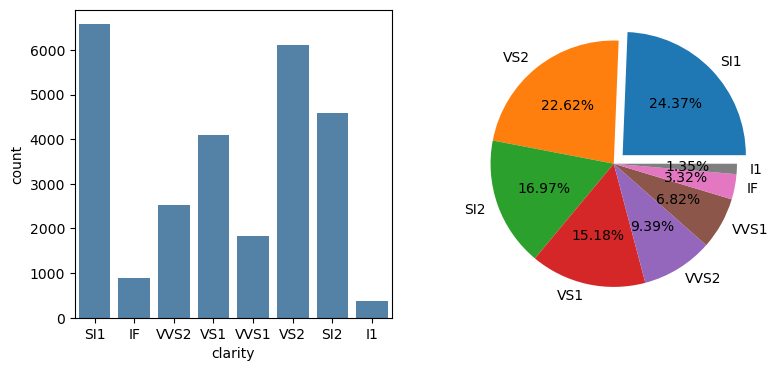

In [32]:
plt.figure(figsize = (9,4))
plt.style.use('default')
Clarity = pd.DataFrame(data['clarity'].value_counts())
Clarity = Clarity.reset_index()
Clarity = Clarity.rename(columns = {'index':'clarity', 'clarity':'count'})

for cla in Clarity.clarity:
    Clarity['perc'] = (Clarity['count'] / data.shape[0] )*100
plt.subplot(121)
sns.countplot(x = 'clarity', data = data, color = 'steelblue')

explode = [0.1,0,0,0,0,0,0,0]
plt.subplot(122)
pie = plt.pie(x = 'perc' , labels = 'clarity' ,autopct = '%1.2f%%', explode = explode, data = Clarity)

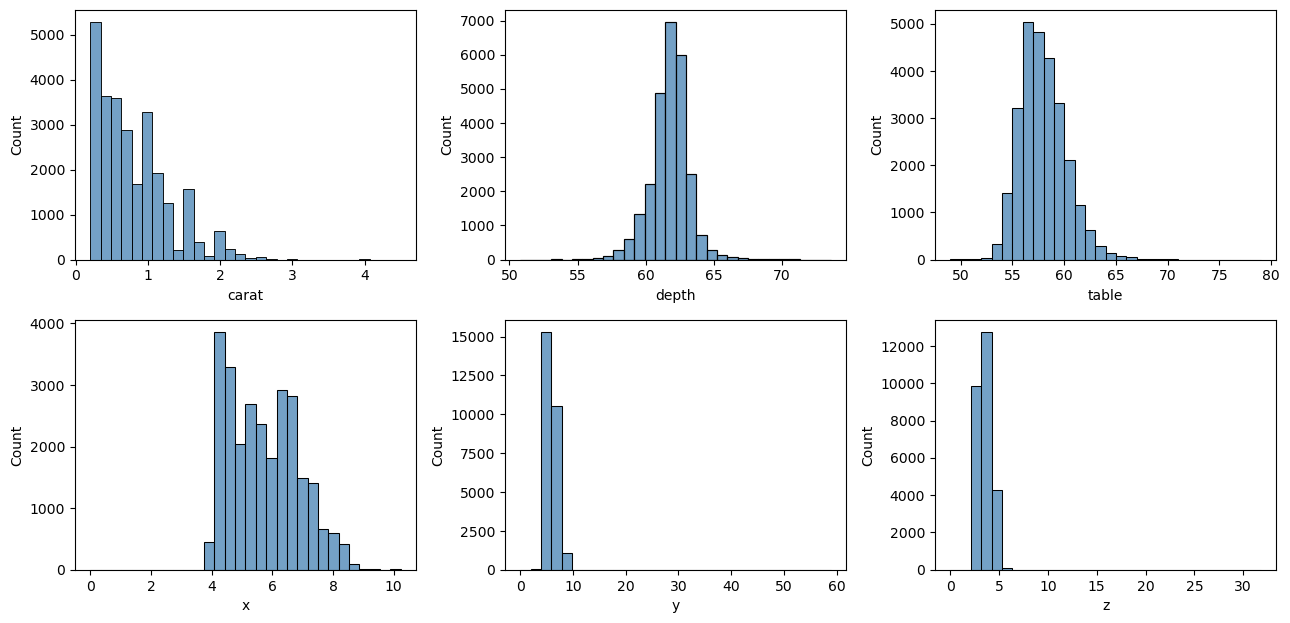

In [37]:
num_cols = [col for col in data.columns if
           data[col].dtype == 'int' or data[col].dtype == 'float']
plt.figure(figsize = (13,9))
for i,col in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    sns.histplot( x = col, data = data, 
                 bins = 30, color = 'steelblue')
    plt.tight_layout()

In [38]:

for col in num_cols:
    print(f'skewness for {col} :',data[col].skew())

skewness for carat : 1.1164807506784393
skewness for depth : -0.028618055138992692
skewness for table : 0.7657581949642266
skewness for x : 0.38798602540205324
skewness for y : 3.85018940739141
skewness for z : 2.568256734005819


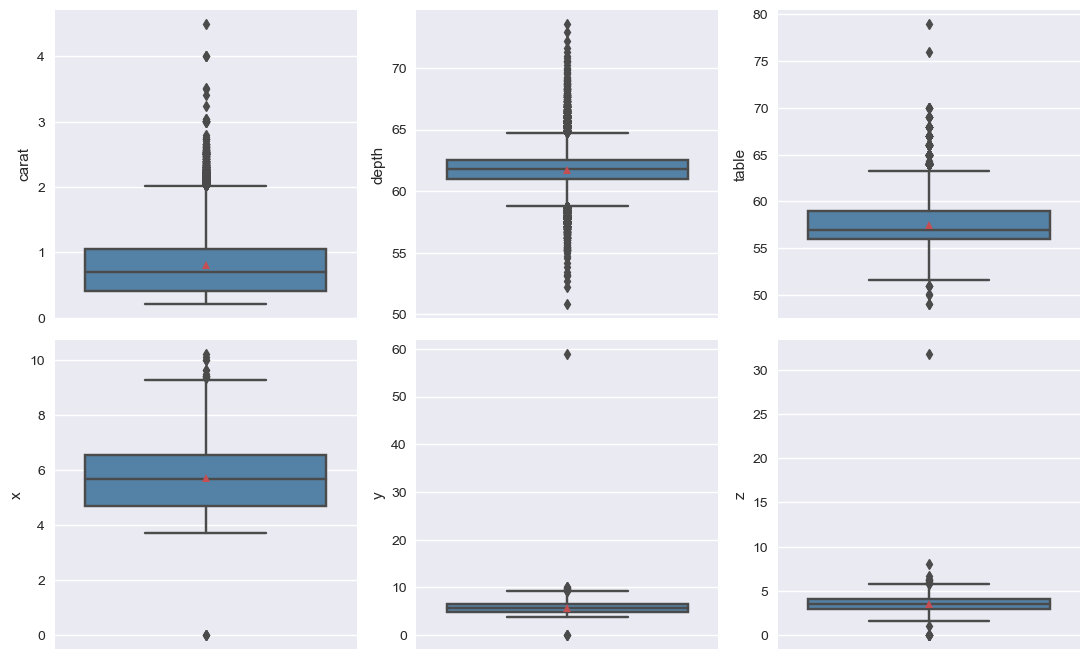

In [39]:
plt.figure(figsize = (11,10))
plt.style.use('seaborn')
for i,col in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot( y = col, data = data, 
                color = 'steelblue',
                showmeans = True)
    plt.tight_layout()

<AxesSubplot:>

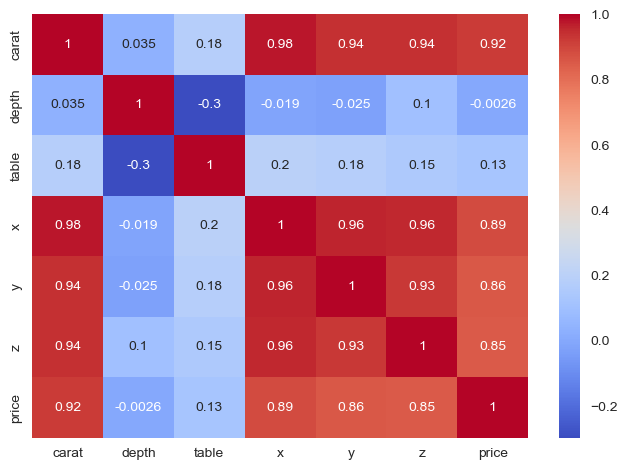

In [41]:

sns.heatmap(data.corr(), annot = True, robust = True, cmap= 'coolwarm')